# Correlation

Using scatterplots we can often see the relationship between values. Stongly correlated values tend to cluster in defined ways, meaning predicting $y$ is possible for a given $x$. Whereas, uncorrelated values tend to appear random for a given value, meaning predicting $y$ would be difficult given $x$.

The relationship between 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

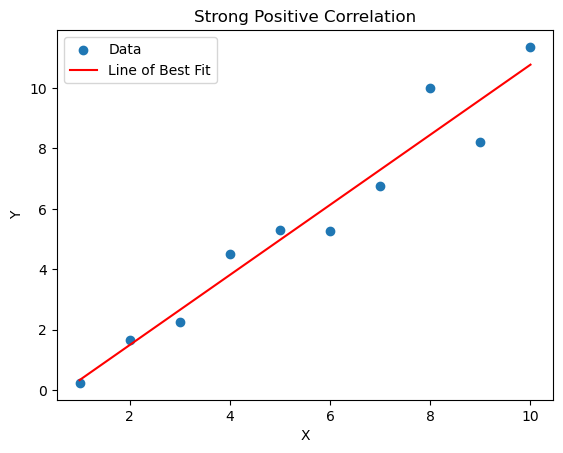

In [16]:
xs = np.arange(1, 11, 1)
std = 1.3
ys = np.sum([std*np.random.randn(10), xs], axis=0)

plt.scatter(xs, ys)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Strong Positive Correlation')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys, 1))(xs), color='red')
plt.legend(['Data', 'Line of Best Fit'])
plt.show()

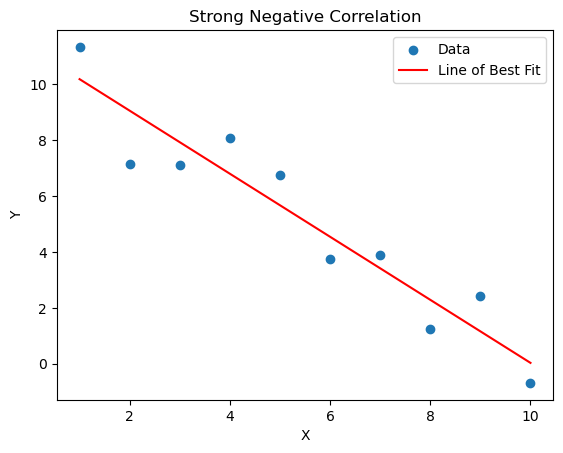

In [17]:
xs = np.arange(1, 11, 1)
std = 1.3
ys = np.sum([std*np.random.randn(10), xs[::-1]], axis=0)

plt.scatter(xs, ys)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Strong Negative Correlation')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys, 1))(xs), color='red')
plt.legend(['Data', 'Line of Best Fit'])
plt.show()

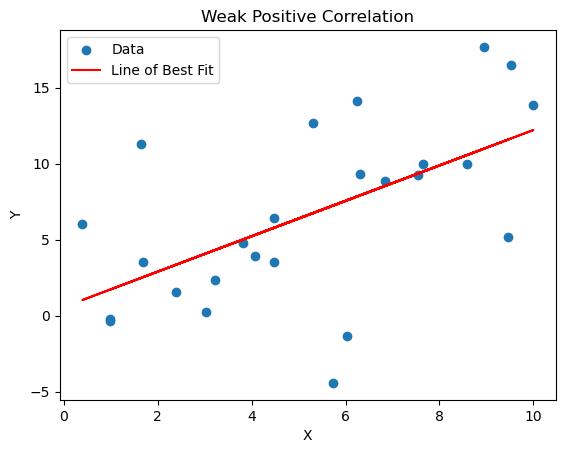

In [18]:
n = 25
xs = 10*np.random.random(n)
std = 4
ys = np.sum([std*np.random.randn(n), xs], axis=0)

plt.scatter(xs, ys)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Weak Positive Correlation')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys, 1))(xs), color='red')
plt.legend(['Data', 'Line of Best Fit'])
plt.show()

### Correlation Coefficient - Pearson's r

$$r = \frac{\text{cov}(X, Y)}{S_x\cdot S_y} = \frac{\text{cov}_{X,Y}}{S_x\cdot S_y}$$

We can think of $r$ as the proportion $X$ and $Y$ vary together compared to the variance in $X$ and $Y$ separately, i.e., their total, independent variations.

Note that $r$ is not a percentage. However, $r^2$ is the percent (%) variation in $Y$ explained by the variation in $X$. $r^2$ is called the *coefficient of determination*.

For data that falls perfectly on a positively sloped line, $r=1$. For data that falls perfectly on a negatively sloped line, $r=-1$. For data that is perfectly uncorrelated, $r=0$. The greater the value of $\lvert r \rvert$, the greater the correlation.

### Example

In [19]:
df = pd.read_csv('./Data/Correlations-Lesson-14.csv')
print('df.shape:', df.shape)
df.head()

df.shape: (61, 9)


,dentist,temp,age,year,pets,eggs,icons,emails,party
0,1,30.0,26,1987,0,0,8,0,30
1,10,10.0,69,1944,0,0,8,0,0
2,10,20.0,39,1974,1,0,34,500,60
3,5,NaN,26,1987,0,12,22,1267,0
4,3,15.0,31,1982,0,3,28,1,30


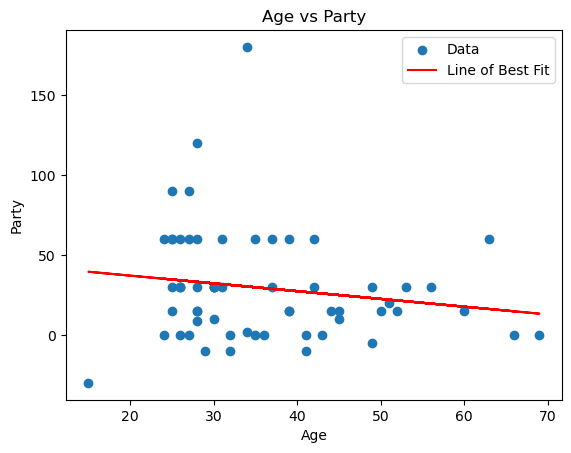

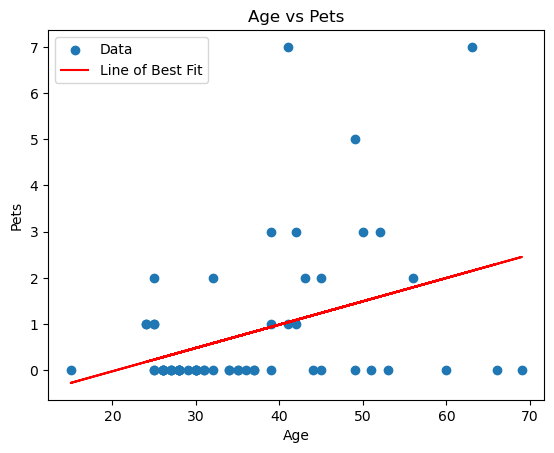

In [20]:
plt.scatter(df['age'], df['party'])
plt.plot(df['age'], np.poly1d(np.polyfit(df['age'], df['party'], 1))(df['age']), color='red')
plt.xlabel('Age')
plt.ylabel('Party')
plt.title('Age vs Party')
plt.legend(['Data', 'Line of Best Fit'])
plt.show()

plt.scatter(df['age'], df['pets'])
plt.plot(df['age'], np.poly1d(np.polyfit(df['age'], df['pets'], 1))(df['age']), color='red')
plt.xlabel('Age')
plt.ylabel('Pets')
plt.title('Age vs Pets')
plt.legend(['Data', 'Line of Best Fit'])
plt.show()

In [21]:
print('Age vs Party, r:', stats.pearsonr(df['age'], df['party'])[0])
print('Age vs Pets, r:', stats.pearsonr(df['age'], df['pets'])[0])

Age vs Party, r: -0.16421412606556712
Age vs Pets, r: 0.37576461379834136


### Hypothesis Testing for $\rho$

As we've seen while conducting hypothesis testing, it is possible that the sample mean and population mean differ due to chance. Similarly, just because it appears like there might be a relationship between two values, they may not actually be correlated (or vice-versa, the population data is correlated but the sample is not). This is known as sampling error. Once way we can reduce sampling error is by increasing the sample size.

Therefore, we must ask, "How much variation is allowable before we decide that our results are not due to chance?" Here, we go back to hypothesis testing. $\rho = \text{true correlation for population}$, and $H_A$ offers the possible alternative hypotheses. $$\begin{align}H_0: &\rho=0\\ H_A: &\rho \lt 0 \\ &\rho \gt 0 \\ &\rho\neq 0 \end{align}$$

To determine if a result is significant, we will also again use t-tests. $$t = \frac{r\sqrt{N-2}}{\sqrt{1-r^2}}$$
If $N=25$ is the number of participants, $df=N-2=23$. For $\alpha=0.05$, $t^*=1.714$  
If $t=2.71$, there is enough evidence to reject $H_0$ given the significant relationship beween $x$ and $y$.

##### Confindence Intervals

We can also compute CI to determine if a $r$ is within it. 

In [23]:
r = stats.pearsonr(df['age'], df['party'])[0]
N = df['age'].shape[0]
t = r*np.sqrt((N-2)/(1-r**2))
print(f'age vs party, t: {t:0.4f}')

r = stats.pearsonr(df['age'], df['pets'])[0]
N = df['age'].shape[0]
t = r*np.sqrt((N-2)/(1-r**2))
print(f'age vs pets, t: {t:0.4f}')

print('df: ', N-2)

age vs party, t: -1.2787
age vs pets, t: 3.1146
df:  59


In the 'age vs party' example, we see that the CI includes 0. Thus, we fail to reject $H_0$.  
However, in the 'age vs pets' example, we can reject the $H_0$ as $\rho \gt 0$

##### Computing $\rho$

Using the $r$ values alrady computed, in 'age vs party', we find $t=-1.2787$ and $df=59$. In 'age vs pets', we find $t=3.1146$, $df=59$.
Computer $\rho$ for both sets of values.

In [27]:
age = np.append(df['age'].values, 20)
pets = np.append(df['pets'].values, 8)

print('age vs pets, r:', stats.pearsonr(age, pets)[0])

age vs pets, r: 0.23148091642148155


### [Causation vs Correlation](https://xkcd.com/552/)

Is it possible to infer causation because two variables are correlated? Many popular beliefs suggest we often think this way (e.g., [Golden Arch Correlation](https://foreignpolicy.com/2020/11/26/mcdonalds-peace-nagornokarabakh-friedman/)).

It is easy to imagine two variables, $X$ and $Y$, that are correlated but only because they are both influenced by a lurking variable $A$. $$\begin{align}A &\to X\\ A &\to Y\end{align}$$.

There are also scenarios where $X$ and $Y$ are correlated but only because $X$ only influences $Y$ through a mediating variable $A$. $$X\to A \to Y$$

By only looking at scatterplots, we cannot determine if there is an influencing variable $A$. To make causal statements, we'd have to know the independent variable occurred prior to the dependent variable while also ruling out any influence of potential latent or lurking variables.

##### Ambiguous Temporal Precedence

* Example 1

A teacher notes that students in his jazz appreciation class really like the jazz music he plays. He concludes the class is causing them to enjoy jazz.

Possible Refute:  
Perhaps the students liked jazz prior to taking the course. Maybe that's the reason they took the class!

* Example 2

Researchers note taht drug use is correlated with delinquincy. They conclude drug use causes delinquincy, and if we reduce drug use, we can decrease delinquincy.

Possible Refute:  
Maybe people were delinquint, but it is because of their delinquincy that they started using drugs.

##### Third Variable Problem

* Example

Students who score high on the SAT tend to have higher graes in college. Therefore, by increasing students' SAT scores, we can increase their grades in college.

Possible Refute:  
It could be that a third variable, such as motivation, effort, intelligence, etc., better explains the correlation. $$\begin{align}\text{motivation} &\to \text{SAT scores}\\ \text{motivation} &\to \text{College grades}\end{align}$$

##### Post hoc Fallacy

Some people who commit violent acts played violent video games before comitting their violent acts. These video games caused violence.

Possible Refute:  
It could be that people who want to commit violent acts also want to play violent video games.

## CORRELATION $\neq$ CAUSATION

### Quiz

##### Question 1
[t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg), HINT: Degrees of freedom $= N-2$

We do a hypothesis test for the true population correlation coefficient ($\rho$) and calculate our t-statistic to be 2.306. If there were 45 data values in our study (45 x-values and 45 y-values), we  
Answer: reject the null

This means we're pretty sure there *is/is not* a true linear relationship between $x$ and $y$.   
Answer: is

##### Question 2

The data in the gestation and longevity dataset is the average gestation period (how long a fetus remains in the womb) and longevity (how long animals live) for a sample of different types of animals. (Source: The World Almanac and Book of Facts, 2006)

Is there a positive or negative correlation for the following dataset?  
Answer: positive

##### Question 3
What is r? What proportion of longevity can be explained by gestation (Hint: use the coefficient of determination)?

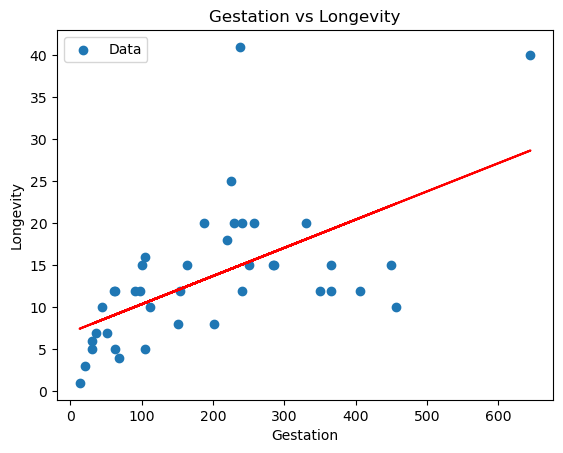

In [34]:
df = pd.read_csv('./Data/Gestation-and-Longevity-Problem-Set-14.csv')
plt.scatter(df['Gestation (days)'], df['Longevity (years)'])
plt.plot(df['Gestation (days)'], np.poly1d(np.polyfit(df['Gestation (days)'], df['Longevity (years)'], 1))(df['Gestation (days)']), color='red')
plt.xlabel('Gestation')
plt.ylabel('Longevity')
plt.title('Gestation vs Longevity')
plt.legend(['Data'])
plt.show()

In [37]:
print('Gestation vs Longevity, r:', stats.pearsonr(df['Gestation (days)'], df['Longevity (years)'])[0])
print('Coefficient of determination, r^2:', stats.pearsonr(df['Gestation (days)'], df['Longevity (years)'])[0]**2)
print('p-value:', stats.pearsonr(df['Gestation (days)'], df['Longevity (years)'])[1])

Gestation vs Longevity, r: 0.5893126939325755
Coefficient of determination, r^2: 0.3472894512300694
p-value: 6.309895087810707e-05


##### Question 4
Do we reject or fail to reject $H_0$ for $\alpha=0.001$?  
Answer: Reject

##### Question 5
What can we conclude about the relationship between gestation period and longevity?  
Answer: Animals taht gestate longer tend to live longer & Animals that live longer tend to gestate longer

NOTE: We cannot state that long gestation periods tend to cause greater longevity.

##### Question 6
Using [GraphPad QuickCalcs](http://www.graphpad.com/quickcalcs/) to determine the p-value for a Pearson correlation coefficient of $r=0.385$ from a sample of $n=30$. What would be your statistical decision at $\alpha=0.05$ and $\alpha=0.01$?  
Answer: Reject the null at $\alpha=0.05$ but not at $\alpha=0.01$